In [1]:
# import all the dependencies 
import pandas as pd
import numpy as np
%matplotlib inline

# plot appears inside the notebook
import matplotlib.pyplot as plt
import seaborn as sns


# import Models from Sckit-Learn 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score

In [5]:
lucene = pd.read_excel("jedit_version2.xls")
lucene

,name,version,name1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,jEdit,4,org.gjt.sp.jedit.gui.MacrosMenu,6,8,0,10,22,15,1,...,0.000000,0,0.994206,0.333333,1,7,20.333333,5,2.1667,0
1,jEdit,4,org.gjt.sp.jedit.options.ModeOptionPane,12,6,0,7,39,28,3,...,1.000000,2,0.983655,0.500000,1,3,45.416667,2,1.1667,1
2,jEdit,4,org.gjt.sp.jedit.gui.OptionsDialog,14,7,0,28,108,69,3,...,1.000000,2,0.980480,0.174603,0,0,50.571429,9,2.1429,1
3,jEdit,4,org.gjt.sp.jedit.buffer.ExplicitFoldHandler,2,2,0,2,6,1,1,...,0.000000,0,0.875000,0.625000,0,0,41.500000,5,2.5000,0
4,jEdit,4,org.gjt.sp.jedit.options.GeneralOptionPane,5,6,0,5,28,0,2,...,1.000000,0,0.993994,0.500000,2,4,64.000000,3,1.6000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,jEdit,4,org.gjt.sp.jedit.pluginmgr.Roster,5,1,0,9,14,0,8,...,1.000000,0,0.000000,0.466667,0,0,15.200000,4,2.0000,1
302,jEdit,4,bsh.TokenMgrError,6,3,0,2,20,15,2,...,0.000000,0,0.850000,0.500000,1,1,28.666667,14,2.8333,0
303,jEdit,4,bsh.CallStack,11,1,0,39,25,0,38,...,1.000000,0,0.000000,0.484848,0,0,11.181818,2,1.1818,0
304,jEdit,4,org.gjt.sp.jedit.search.HyperSearchResults,14,5,0,19,67,55,10,...,0.833333,1,0.980480,0.257143,3,12,24.357143,10,1.8571,1


In [6]:
# Lucene 2.4 for testset
luc_X = lucene.drop(columns=["name1","name","version","bug"] ,axis=1)
Xtest = luc_X
Xtest

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,6,8,0,10,22,15,1,10,4,2.000000,128,0.000000,0,0.994206,0.333333,1,7,20.333333,5,2.1667
1,12,6,0,7,39,28,3,6,1,0.397727,573,1.000000,2,0.983655,0.500000,1,3,45.416667,2,1.1667
2,14,7,0,28,108,69,3,28,8,0.869231,732,1.000000,2,0.980480,0.174603,0,0,50.571429,9,2.1429
3,2,2,0,2,6,1,1,2,2,2.000000,85,0.000000,0,0.875000,0.625000,0,0,41.500000,5,2.5000
4,5,6,0,5,28,0,2,4,1,0.708333,337,1.000000,0,0.993994,0.500000,2,4,64.000000,3,1.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,5,1,0,9,14,0,8,2,0,0.000000,82,1.000000,0,0.000000,0.466667,0,0,15.200000,4,2.0000
302,6,3,0,2,20,15,2,0,4,1.120000,183,0.000000,0,0.850000,0.500000,1,1,28.666667,14,2.8333
303,11,1,0,39,25,0,38,2,11,0.000000,135,1.000000,0,0.000000,0.484848,0,0,11.181818,2,1.1818
304,14,5,0,19,67,55,10,16,8,0.820513,361,0.833333,1,0.980480,0.257143,3,12,24.357143,10,1.8571


In [7]:

# turning the dataset to an array
luc_y = lucene["bug"]
# a = luc_y.iloc[:247]
ytest =luc_y
# a
ytest



0      0
1      1
2      1
3      0
4      1
      ..
301    1
302    0
303    0
304    1
305    0
Name: bug, Length: 306, dtype: int64

In [8]:
# lucene 2.2 for train set
lucene2 = pd.read_excel("jedit_version1.xls")
lucene2

,name,version,name1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,jEdit,3.2.1,org.gjt.sp.jedit.Registers,14,1,0,9,45,61,3,...,1.000000,1,0.000000,0.294872,0,0,29.142857,8,2.4286,0
1,jEdit,3.2.1,gnu.regexp.RETokenRepeated,7,2,0,4,21,0,1,...,1.000000,1,0.538462,0.333333,1,3,41.285714,16,4.7143,0
2,jEdit,3.2.1,gnu.regexp.REMatchEnumeration,6,1,0,3,11,9,1,...,1.000000,3,0.000000,0.333333,0,0,16.333333,5,1.5000,0
3,jEdit,3.2.1,bsh.BSHType,6,2,0,16,14,3,8,...,1.000000,0,0.782609,0.444444,0,0,13.833333,1,0.8333,0
4,jEdit,3.2.1,gnu.regexp.RETokenOneOf,5,2,0,5,22,0,1,...,1.000000,0,0.700000,0.350000,1,3,39.800000,11,4.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,jEdit,3.2.1,bsh.NameSource,2,1,0,2,2,1,2,...,0.000000,0,0.000000,0.750000,0,0,0.000000,1,1.0000,0
268,jEdit,3.2.1,org.gjt.sp.jedit.pluginmgr.Roster,5,1,0,9,14,0,8,...,1.000000,0,0.000000,0.466667,0,0,15.200000,4,2.0000,0
269,jEdit,3.2.1,bsh.CommandLineReader,4,3,0,1,8,4,1,...,0.000000,0,0.857143,0.350000,2,2,18.500000,1,0.7500,0
270,jEdit,3.2.1,bsh.CallStack,11,1,0,39,25,0,38,...,1.000000,0,0.000000,0.484848,0,0,11.181818,2,1.1818,0


In [9]:
# lucene 2.2 dropped features

lucX = lucene2.drop(columns=["name1","name","version","bug"] ,axis=1)
lucX

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,14,1,0,9,45,61,3,6,11,0.769231,425,1.000000,1,0.000000,0.294872,0,0,29.142857,8,2.4286
1,7,2,0,4,21,0,1,3,0,0.541667,300,1.000000,1,0.538462,0.333333,1,3,41.285714,16,4.7143
2,6,1,0,3,11,9,1,3,5,0.600000,113,1.000000,3,0.000000,0.333333,0,0,16.333333,5,1.5000
3,6,2,0,16,14,3,8,8,5,0.666667,92,1.000000,0,0.782609,0.444444,0,0,13.833333,1,0.8333
4,5,2,0,5,22,0,1,4,0,0.125000,206,1.000000,0,0.700000,0.350000,1,3,39.800000,11,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2,1,0,2,2,1,2,1,2,2.000000,2,0.000000,0,0.000000,0.750000,0,0,0.000000,1,1.0000
268,5,1,0,9,14,0,8,2,0,0.000000,82,1.000000,0,0.000000,0.466667,0,0,15.200000,4,2.0000
269,4,3,0,1,8,4,1,0,4,1.000000,82,0.000000,0,0.857143,0.350000,2,2,18.500000,1,0.7500
270,11,1,0,39,25,0,38,2,11,0.000000,135,1.000000,0,0.000000,0.484848,0,0,11.181818,2,1.1818


In [10]:

Xtrain = lucX
Xtrain

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,14,1,0,9,45,61,3,6,11,0.769231,425,1.000000,1,0.000000,0.294872,0,0,29.142857,8,2.4286
1,7,2,0,4,21,0,1,3,0,0.541667,300,1.000000,1,0.538462,0.333333,1,3,41.285714,16,4.7143
2,6,1,0,3,11,9,1,3,5,0.600000,113,1.000000,3,0.000000,0.333333,0,0,16.333333,5,1.5000
3,6,2,0,16,14,3,8,8,5,0.666667,92,1.000000,0,0.782609,0.444444,0,0,13.833333,1,0.8333
4,5,2,0,5,22,0,1,4,0,0.125000,206,1.000000,0,0.700000,0.350000,1,3,39.800000,11,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2,1,0,2,2,1,2,1,2,2.000000,2,0.000000,0,0.000000,0.750000,0,0,0.000000,1,1.0000
268,5,1,0,9,14,0,8,2,0,0.000000,82,1.000000,0,0.000000,0.466667,0,0,15.200000,4,2.0000
269,4,3,0,1,8,4,1,0,4,1.000000,82,0.000000,0,0.857143,0.350000,2,2,18.500000,1,0.7500
270,11,1,0,39,25,0,38,2,11,0.000000,135,1.000000,0,0.000000,0.484848,0,0,11.181818,2,1.1818


In [11]:
# turning the dataset to an array
lucy = lucene2["bug"]
# a = lucy.iloc[:].values
# ytest = a
ytrain = lucy
ytrain



0      0
1      0
2      0
3      0
4      0
      ..
267    0
268    0
269    0
270    0
271    1
Name: bug, Length: 272, dtype: int64

In [12]:
from collections import Counter
counter = Counter(ytrain)
for sam_1 ,  sam_0 in counter.items():
    dist = sam_0/len(ytrain) * 100
    print(f"Class={sam_1} , n={sam_0} ({dist}%)")

Class=0 , n=182 (66.91176470588235%)
Class=1 , n=90 (33.088235294117645%)


In [13]:
#  the data has been been split , we can train our model into 
from sklearn.ensemble import RandomForestClassifier
model = {"RandomForest": RandomForestClassifier(n_estimators=95,
                                                min_samples_split=2,
                                                max_depth=None,
                                                min_samples_leaf=2,
                                                n_jobs=10)}

# Create a function to fit and score model
def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
    This method is used:
    To fit and evaluate a machine learning algorithm RandomForestClassifier.
    X_train: training data (The bug column was removed)
    X_test: It contains the label to be used for testing the model
    y_train: training label of the bug_column
    y_test: test label of the bug_column
    """
    model_score = {}
    model_score_train =[]
    for name , model in model.items():
        model.fit(X_train, y_train) #sample_weight=np.where(y_train==0,1.5,1))
        y_preds = model.predict(X_test)
        a = model.score(X_train, y_train)
        #Evaluate the model and append it score to model_score
        model_score_train.append(a)
        #this is the probability of estimates
        model_score[name] = model.score(X_test, y_test)       
        
    sns.set(font_scale=1.5) # increase the font size of the graph

    def plot_conf_matrix(y_test, y_preds):
        fig , ax = plt.subplots(figsize=(5,5))
        ax = sns.heatmap(confusion_matrix(y_test, y_preds),fmt=".1f",
                      annot=True, #this is for box annotation
                      cbar=False) 

        plt.xlabel("Predicted label")
        plt.ylabel("True label")      
        
    return model_score,  model_score_train, plot_conf_matrix(y_test=ytest,y_preds=y_preds)

       

({'RandomForest': 0.7777777777777778}, [0.9742647058823529], None)

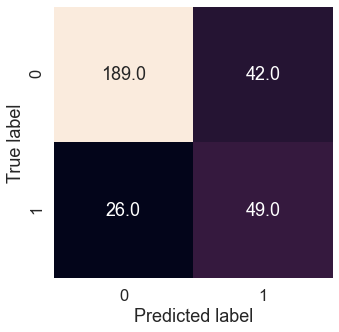

In [14]:
 fit_and_score(model, X_train=Xtrain , X_test=Xtest, y_train=ytrain, y_test=ytest)


In [15]:
# Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got netwon-cg.

In [16]:
Xtrain.isnull().sum()

wmc       0
dit       0
noc       0
cbo       0
rfc       0
lcom      0
ca        0
ce        0
npm       0
lcom3     0
loc       0
dam       0
moa       0
mfa       0
cam       0
ic        0
cbm       0
amc       0
max_cc    0
avg_cc    0
dtype: int64

In [17]:
#Create a hyperparameter turning using randomisedCV for RandomForestClassifier
lucene_grid = {"n_estimators": np.arange(5,150,10), #number of trees
              "max_depth": [None, 2, 5, 10], # depth of trees
              "min_samples_split": np.arange(2, 30, 2),#split an internal node into features
              "min_samples_leaf":np.arange(2, 30, 2), # #samples required to be at a leaf node
               "class_weight": [None, {0:1, 0:1.5}, {0:1, 1:10}]
              }    
lucene_rf_grid = GridSearchCV(RandomForestClassifier(),n_jobs=10,
                             param_grid=lucene_grid,
                             cv=5,
                             verbose=True)


# fit grid hyperparamter search model
lucene_rf_grid.fit(Xtrain,ytrain)



Fitting 5 folds for each of 35280 candidates, totalling 176400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'class_weight': [None, {0: 1.5}, {0: 1, 1: 10}],
                         'max_depth': [None, 2, 5, 10],
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'n_estimators': array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145])},
             verbose=True)

In [18]:
lucene_rf_grid.best_params_



{'class_weight': None,
 'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 12,
 'n_estimators': 105}

In [19]:
lucene_rf_grid.score(Xtest, ytest)



0.7908496732026143

In [20]:
#predict on the test dataset
lucene_preds = lucene_rf_grid.predict(Xtest)
lucene_preds.shape



(306,)

In [21]:
#putting the best parameters into a list
lucene_best_params = pd.DataFrame([lucene_rf_grid.best_params_])
lucene_best_params



,class_weight,max_depth,min_samples_leaf,min_samples_split,n_estimators
0,None,None,6,12,105


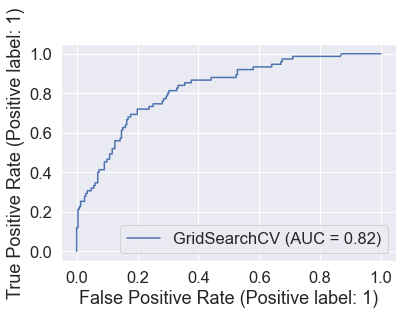

In [22]:
plot_roc_curve(lucene_rf_grid, Xtest, ytest);



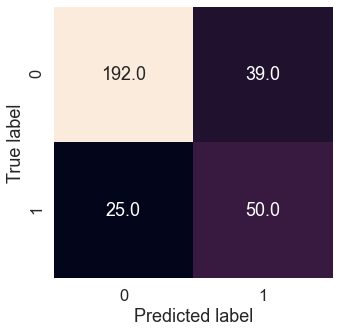

In [23]:
# Confusion Matrix
# confusion matrix function
import seaborn as sns

sns.set(font_scale=1.5) # increase the font size of the graph

def plot_conf_matrix(y_test, lucene_preds):
    """
    plot a confusion matrix using seasborn's heatmap
    """
    
    fig , ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, lucene_preds), fmt='.1f',
                  annot=True, #this is for box annotation
                  cbar=False) 
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_matrix(ytest, lucene_preds)
    
#x-axis = model predictions
# y_axis = true labels

In [24]:
print(classification_report(ytest, lucene_preds))


              precision    recall  f1-score   support

           0       0.88      0.83      0.86       231
           1       0.56      0.67      0.61        75

    accuracy                           0.79       306
   macro avg       0.72      0.75      0.73       306
weighted avg       0.81      0.79      0.80       306



In [25]:
#predict on the test dataset
lucene_preds = lucene_rf_grid.predict(Xtest)
lucene_preds.shape

(306,)

In [26]:
a = list(lucene_preds)
# a
# len(a)

In [27]:
b = list(luc_y)
#type(b)
#len(b)
# b

In [28]:
#  calculate the f1, precision and recall
def f1_score(ytest, y_preds):
    TP = 0
    TN = 0
    FN = 0
    FP = 0 
    for i , j in zip(a, b):
        if i == 0 and j == 0:
            TP +=1
        elif i == 1 and j == 1:
            TN +=1
        elif i == 1 and j == 0:
            FN += 1
        else:
            i == 0 and j == 1
            FP += 1
    print(TP),print(TN), print(FN), print(FP)         
    prec = (TP/(TP + FP))
    recal = (TP /(TP + FN))
    f1 = (2 * recal * prec)/(recal + prec)
    data = {'precision': [prec] , 'recall': [recal], 'f1': [f1]}
    df = pd.DataFrame(data=data)
    
    return df

In [29]:
f1_score(ytest=b, y_preds=a)

192
50
39
25


,precision,recall,f1
0,0.884793,0.831169,0.857143


In [30]:
lps = lucene_preds
lps

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,

In [31]:
lis =[]
def make_list():
    c = "misclassified defective"
    d = "misclassified non_defective"
    e = "classified correctly"
    for lucypreds, lucyytest in zip(a, b):
        if lucypreds < lucyytest:
            lis.append(d)
        elif lucyytest < lucypreds:
            lis.append(c)
        else:
            lis.append(e)
    return lis

newstatas = make_list()
newstatas

['classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'misclassified defective',
 'misclassified non_defective',
 'classified correctly',
 'misclassified defective',
 'misclassified non_defective',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'misclassified defective',
 'classified correctly',
 'misclassified non_defective',
 'misclassified non_defective',
 'misclassified defective',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'classified correctly',
 'misclassified defective',
 'classified correctly',
 'classified correctly',
 'class

In [32]:
df = pd.DataFrame(newstatas)
df.rename(columns={"class_error_cols": "bug"})
df.rename(columns={0: "bug"})
df3 = df.rename(columns={0: "bug"})
# df3.set_index()
df3

,bug
0,classified correctly
1,classified correctly
2,classified correctly
3,classified correctly
4,classified correctly
...,...
301,misclassified non_defective
302,classified correctly
303,classified correctly
304,classified correctly


In [33]:
af = luc_y.reset_index()
af

,index,bug
0,0,0
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
301,301,1
302,302,0
303,303,0
304,304,1


In [34]:
luc_gspreds_df = pd.DataFrame(lucene_preds)
afs = luc_gspreds_df.rename(columns={0:"bug"})
afs

,bug
0,0
1,1
2,1
3,0
4,1
...,...
301,0
302,0
303,0
304,1


In [35]:
# Create a new Data
newData = pd.concat([af,afs, df3],axis=1, ignore_index=False, join="inner")
newData
new_Data = newData.set_index('index')
new_Data

,bug,bug,bug
index,,,
0,0,0,classified correctly
1,1,1,classified correctly
2,1,1,classified correctly
3,0,0,classified correctly
4,1,1,classified correctly
...,...,...,...
301,1,0,misclassified non_defective
302,0,0,classified correctly
303,0,0,classified correctly


In [36]:
df2 = pd.DataFrame(luc_X)
df2

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,6,8,0,10,22,15,1,10,4,2.000000,128,0.000000,0,0.994206,0.333333,1,7,20.333333,5,2.1667
1,12,6,0,7,39,28,3,6,1,0.397727,573,1.000000,2,0.983655,0.500000,1,3,45.416667,2,1.1667
2,14,7,0,28,108,69,3,28,8,0.869231,732,1.000000,2,0.980480,0.174603,0,0,50.571429,9,2.1429
3,2,2,0,2,6,1,1,2,2,2.000000,85,0.000000,0,0.875000,0.625000,0,0,41.500000,5,2.5000
4,5,6,0,5,28,0,2,4,1,0.708333,337,1.000000,0,0.993994,0.500000,2,4,64.000000,3,1.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,5,1,0,9,14,0,8,2,0,0.000000,82,1.000000,0,0.000000,0.466667,0,0,15.200000,4,2.0000
302,6,3,0,2,20,15,2,0,4,1.120000,183,0.000000,0,0.850000,0.500000,1,1,28.666667,14,2.8333
303,11,1,0,39,25,0,38,2,11,0.000000,135,1.000000,0,0.000000,0.484848,0,0,11.181818,2,1.1818
304,14,5,0,19,67,55,10,16,8,0.820513,361,0.833333,1,0.980480,0.257143,3,12,24.357143,10,1.8571


In [37]:
new_Data= pd.concat([luc_X, new_Data], axis=1, join="outer")
new_Data

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug,bug,bug
0,6,8,0,10,22,15,1,10,4,2.000000,...,0.994206,0.333333,1,7,20.333333,5,2.1667,0,0,classified correctly
1,12,6,0,7,39,28,3,6,1,0.397727,...,0.983655,0.500000,1,3,45.416667,2,1.1667,1,1,classified correctly
2,14,7,0,28,108,69,3,28,8,0.869231,...,0.980480,0.174603,0,0,50.571429,9,2.1429,1,1,classified correctly
3,2,2,0,2,6,1,1,2,2,2.000000,...,0.875000,0.625000,0,0,41.500000,5,2.5000,0,0,classified correctly
4,5,6,0,5,28,0,2,4,1,0.708333,...,0.993994,0.500000,2,4,64.000000,3,1.6000,1,1,classified correctly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,5,1,0,9,14,0,8,2,0,0.000000,...,0.000000,0.466667,0,0,15.200000,4,2.0000,1,0,misclassified non_defective
302,6,3,0,2,20,15,2,0,4,1.120000,...,0.850000,0.500000,1,1,28.666667,14,2.8333,0,0,classified correctly
303,11,1,0,39,25,0,38,2,11,0.000000,...,0.000000,0.484848,0,0,11.181818,2,1.1818,0,0,classified correctly
304,14,5,0,19,67,55,10,16,8,0.820513,...,0.980480,0.257143,3,12,24.357143,10,1.8571,1,1,classified correctly


In [38]:
new_Data.to_excel("new_Data_RF_jedit.xlsx", sheet_name="Test")



In [41]:
lucene_new_rf = RandomForestClassifier(n_estimators=105,max_depth=None,
                                       min_samples_leaf= 6,
                                       min_samples_split=12,
                                       class_weight=None)



In [42]:
# finding feature importance
import time
import numpy as np
start_time = time.time()
lucene_new_rf.fit(luc_X,luc_y)
importances = lucene_new_rf.feature_importances_
feature_names = luc_X.columns
print(feature_names)

std = np.std([
    tree.feature_importances_ for tree in lucene_new_rf.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Index(['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3',
       'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc',
       'avg_cc'],
      dtype='object')
Elapsed time to compute the importances: 0.127 seconds


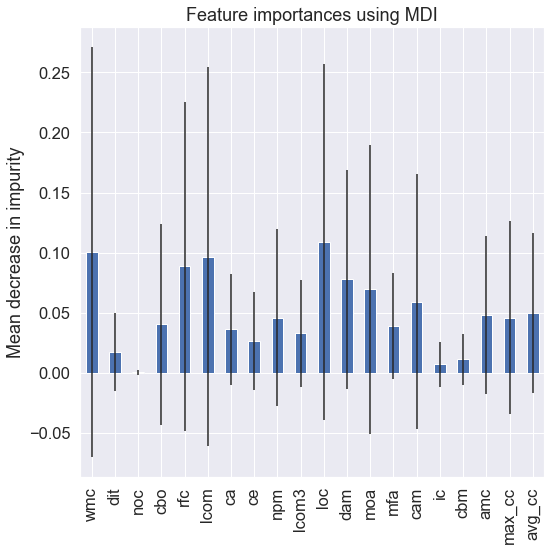

In [43]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(8,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [44]:
lucene_pres = pd.read_excel("new_Data_RF_jedit.xlsx")
lucene_pres

,Unnamed: 0,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug,bug.1,bug.2
0,0,6,8,0,10,22,15,1,10,4,...,0.994206,0.333333,1,7,20.333333,5,2.1667,0,0,classified correctly
1,1,12,6,0,7,39,28,3,6,1,...,0.983655,0.500000,1,3,45.416667,2,1.1667,1,1,classified correctly
2,2,14,7,0,28,108,69,3,28,8,...,0.980480,0.174603,0,0,50.571429,9,2.1429,1,1,classified correctly
3,3,2,2,0,2,6,1,1,2,2,...,0.875000,0.625000,0,0,41.500000,5,2.5000,0,0,classified correctly
4,4,5,6,0,5,28,0,2,4,1,...,0.993994,0.500000,2,4,64.000000,3,1.6000,1,1,classified correctly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,301,5,1,0,9,14,0,8,2,0,...,0.000000,0.466667,0,0,15.200000,4,2.0000,1,0,misclassified non_defective
302,302,6,3,0,2,20,15,2,0,4,...,0.850000,0.500000,1,1,28.666667,14,2.8333,0,0,classified correctly
303,303,11,1,0,39,25,0,38,2,11,...,0.000000,0.484848,0,0,11.181818,2,1.1818,0,0,classified correctly
304,304,14,5,0,19,67,55,10,16,8,...,0.980480,0.257143,3,12,24.357143,10,1.8571,1,1,classified correctly


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# svc_lucene["corect"] = np.where(svc_lucene['bug_actual'] == svc_lucene['bug_preds'])
# svc_lucene.drop("correct", axis=1)
lucene_pres["correct"] = np.where(lucene_pres['bug'] == lucene_pres['bug.1'], 'True', 'False')
lucene_pres

,Unnamed: 0,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,cam,ic,cbm,amc,max_cc,avg_cc,bug,bug.1,bug.2,correct
0,0,6,8,0,10,22,15,1,10,4,...,0.333333,1,7,20.333333,5,2.1667,0,0,classified correctly,True
1,1,12,6,0,7,39,28,3,6,1,...,0.500000,1,3,45.416667,2,1.1667,1,1,classified correctly,True
2,2,14,7,0,28,108,69,3,28,8,...,0.174603,0,0,50.571429,9,2.1429,1,1,classified correctly,True
3,3,2,2,0,2,6,1,1,2,2,...,0.625000,0,0,41.500000,5,2.5000,0,0,classified correctly,True
4,4,5,6,0,5,28,0,2,4,1,...,0.500000,2,4,64.000000,3,1.6000,1,1,classified correctly,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,301,5,1,0,9,14,0,8,2,0,...,0.466667,0,0,15.200000,4,2.0000,1,0,misclassified non_defective,False
302,302,6,3,0,2,20,15,2,0,4,...,0.500000,1,1,28.666667,14,2.8333,0,0,classified correctly,True
303,303,11,1,0,39,25,0,38,2,11,...,0.484848,0,0,11.181818,2,1.1818,0,0,classified correctly,True
304,304,14,5,0,19,67,55,10,16,8,...,0.257143,3,12,24.357143,10,1.8571,1,1,classified correctly,True


In [46]:
def plot_incorrect_predictions(data, x_features, y_features):
    fig, axs = plt.subplots(2,2, figsize=(40, 40))
    axs = axs.flatten()
    sns.stripplot(x=x_features, y=y_features, linewidth=1,orient ="h", size=10, hue="bug", data=lucene_pres, jitter=True, ax=axs[0])
    sns.stripplot(x=x_features, y=y_features, linewidth=1,orient ="h", size=10, hue="bug.1", data=lucene_pres, jitter=True, ax=axs[1])
    sns.stripplot(x=x_features, y=y_features,linewidth=1,orient ="h", size=10, hue="correct", data=lucene_pres,ax=axs[2])
    axs[3].set_visible(False)
    plt.show()

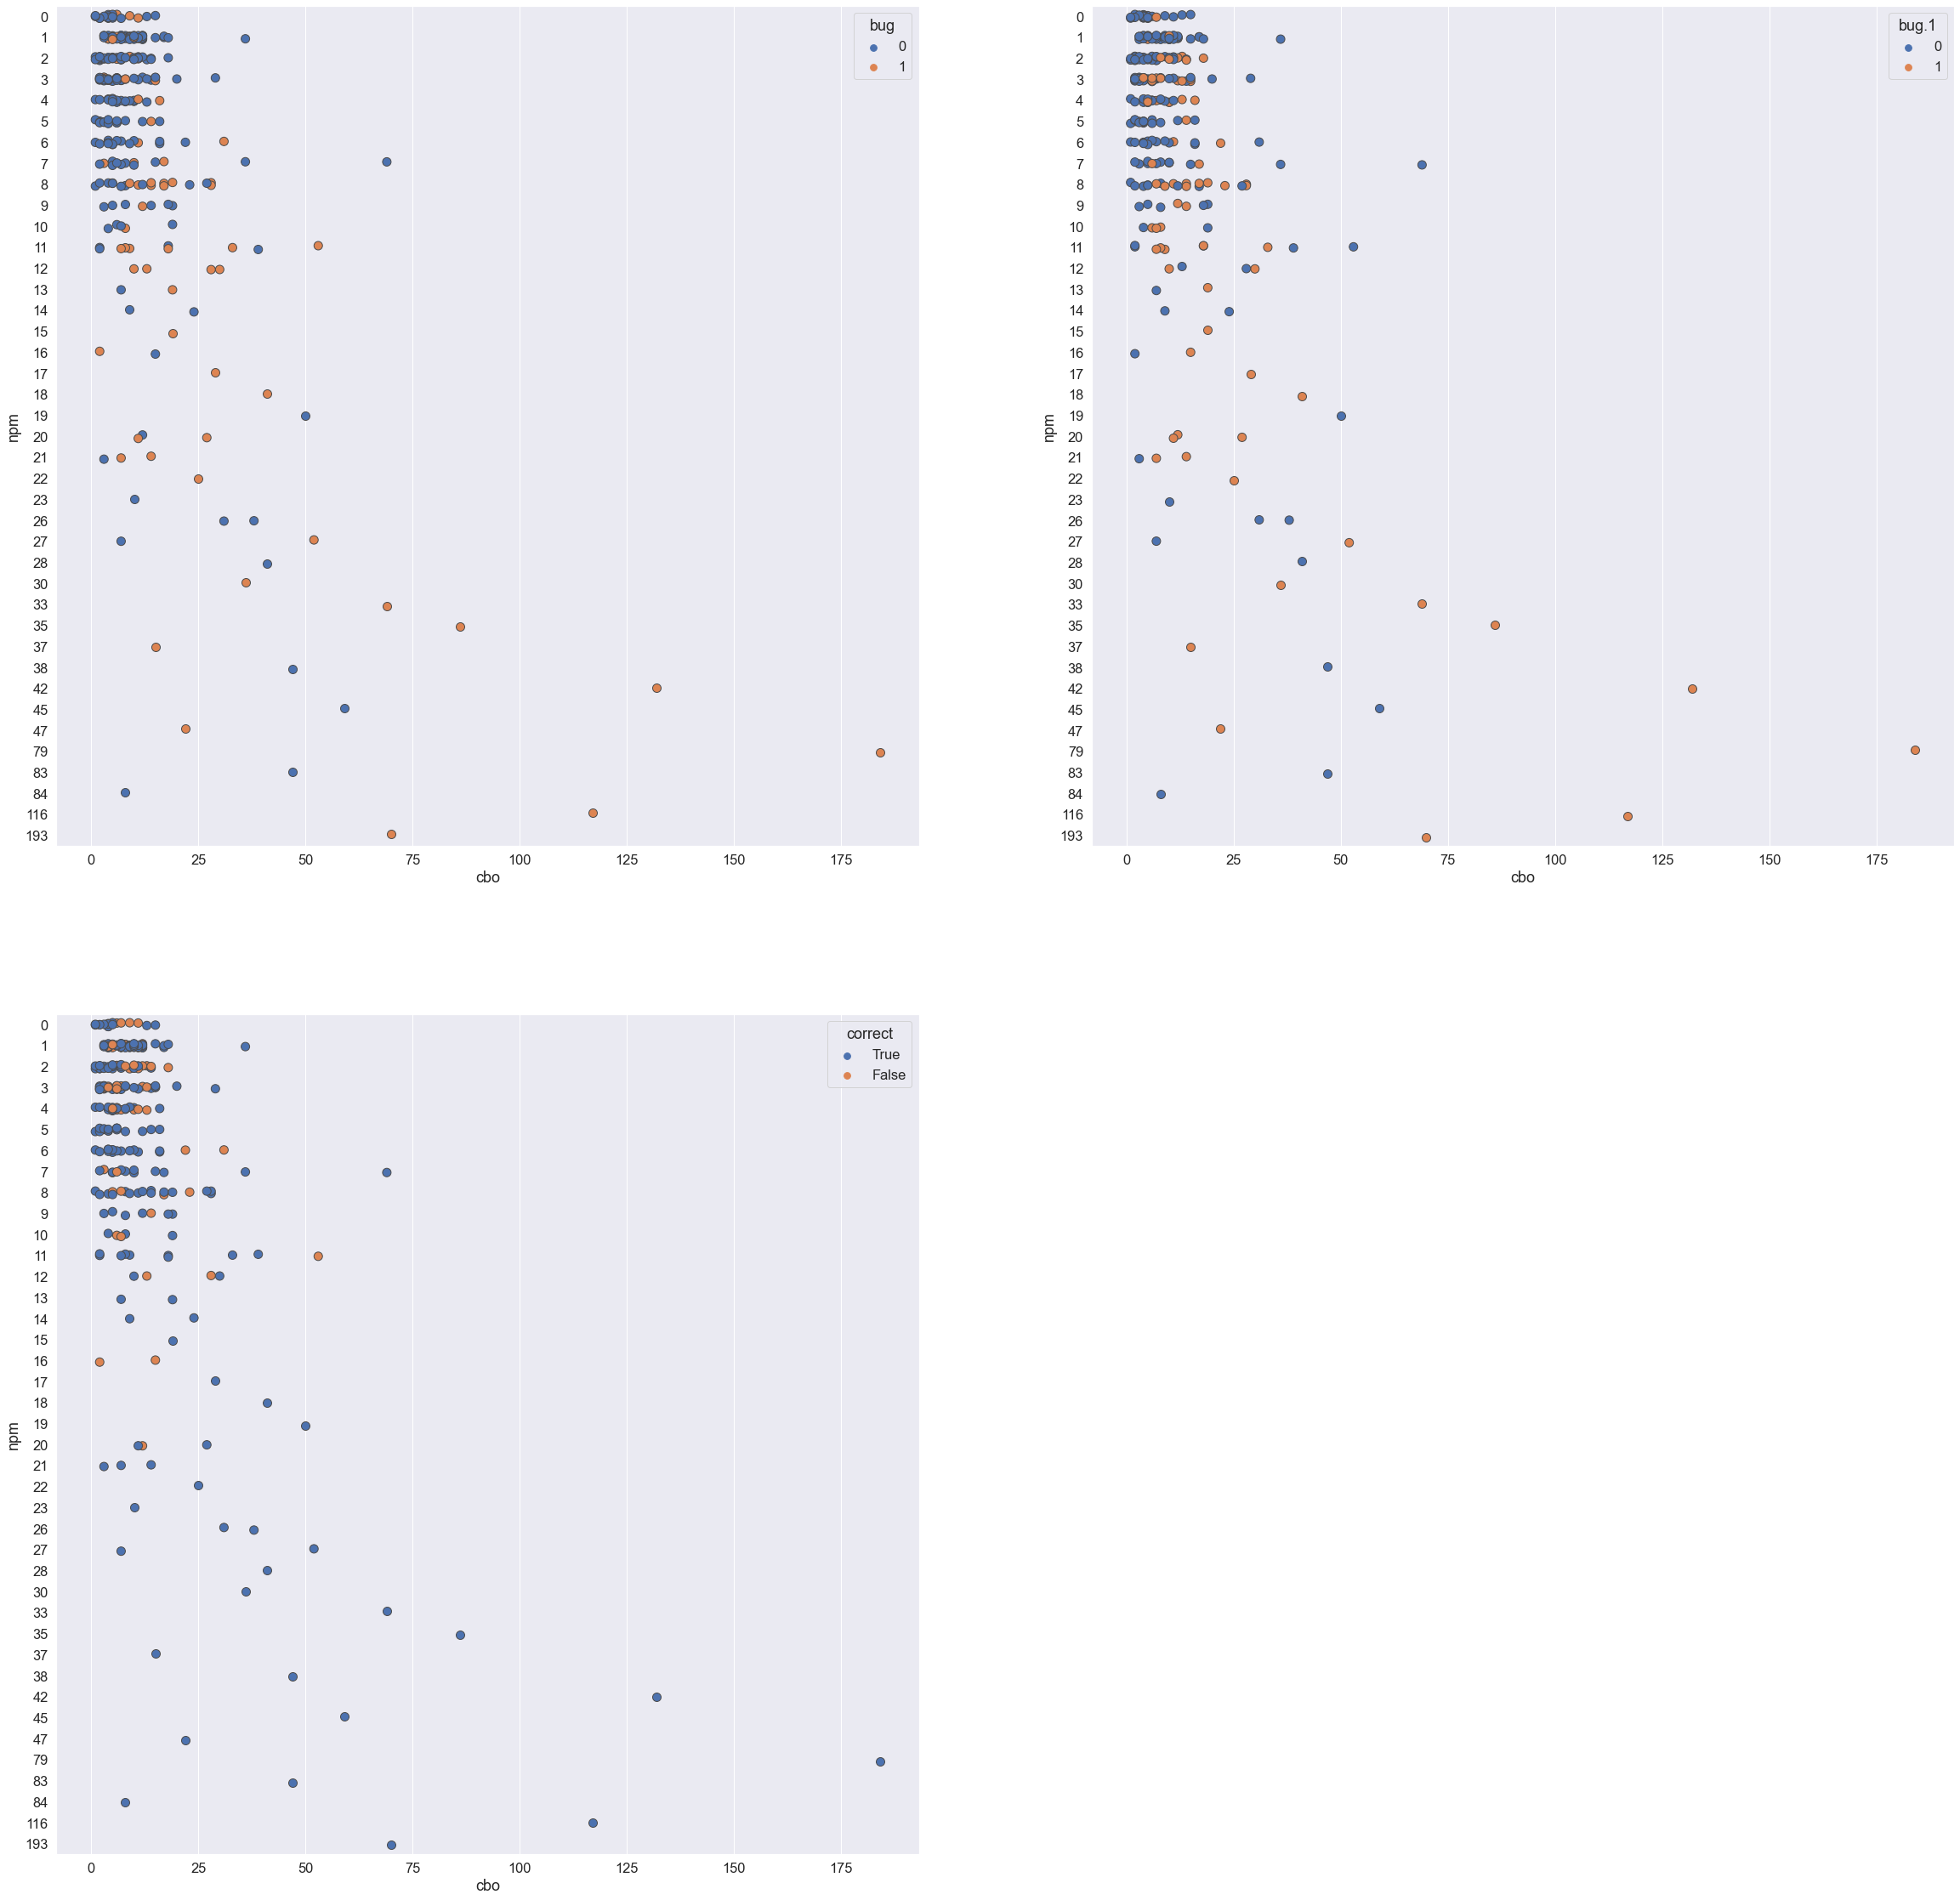

In [47]:
plot_incorrect_predictions(lucene_pres,"cbo", "npm")

In [48]:
def plot_incorrect_predictions(data, x_features, y_features):
    fig, axs = plt.subplots(2,2, figsize=(40, 40))
    axs = axs.flatten()
    sns.stripplot(x=x_features, y=y_features, hue="bug", data=lucene_pres, jitter=True, ax=axs[0])
    sns.stripplot(x=x_features, y=y_features, hue="bug.1", data=lucene_pres, jitter=True, ax=axs[1])
    axs[3] = sns.boxplot(x=x_features, y=y_features, hue="bug.1", data=lucene_pres, whis=np.inf)
    sns.stripplot(x=x_features, y=y_features, hue="correct", data=lucene_pres,ax=axs[3])
#     axs[3].set_visible(False)
    plt.show()

/Users/femitemiola/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/femitemiola/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/femitemiola/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/femitemiola/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/femitemiola/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/femitemiola/opt/anaconda3/lib/python3.

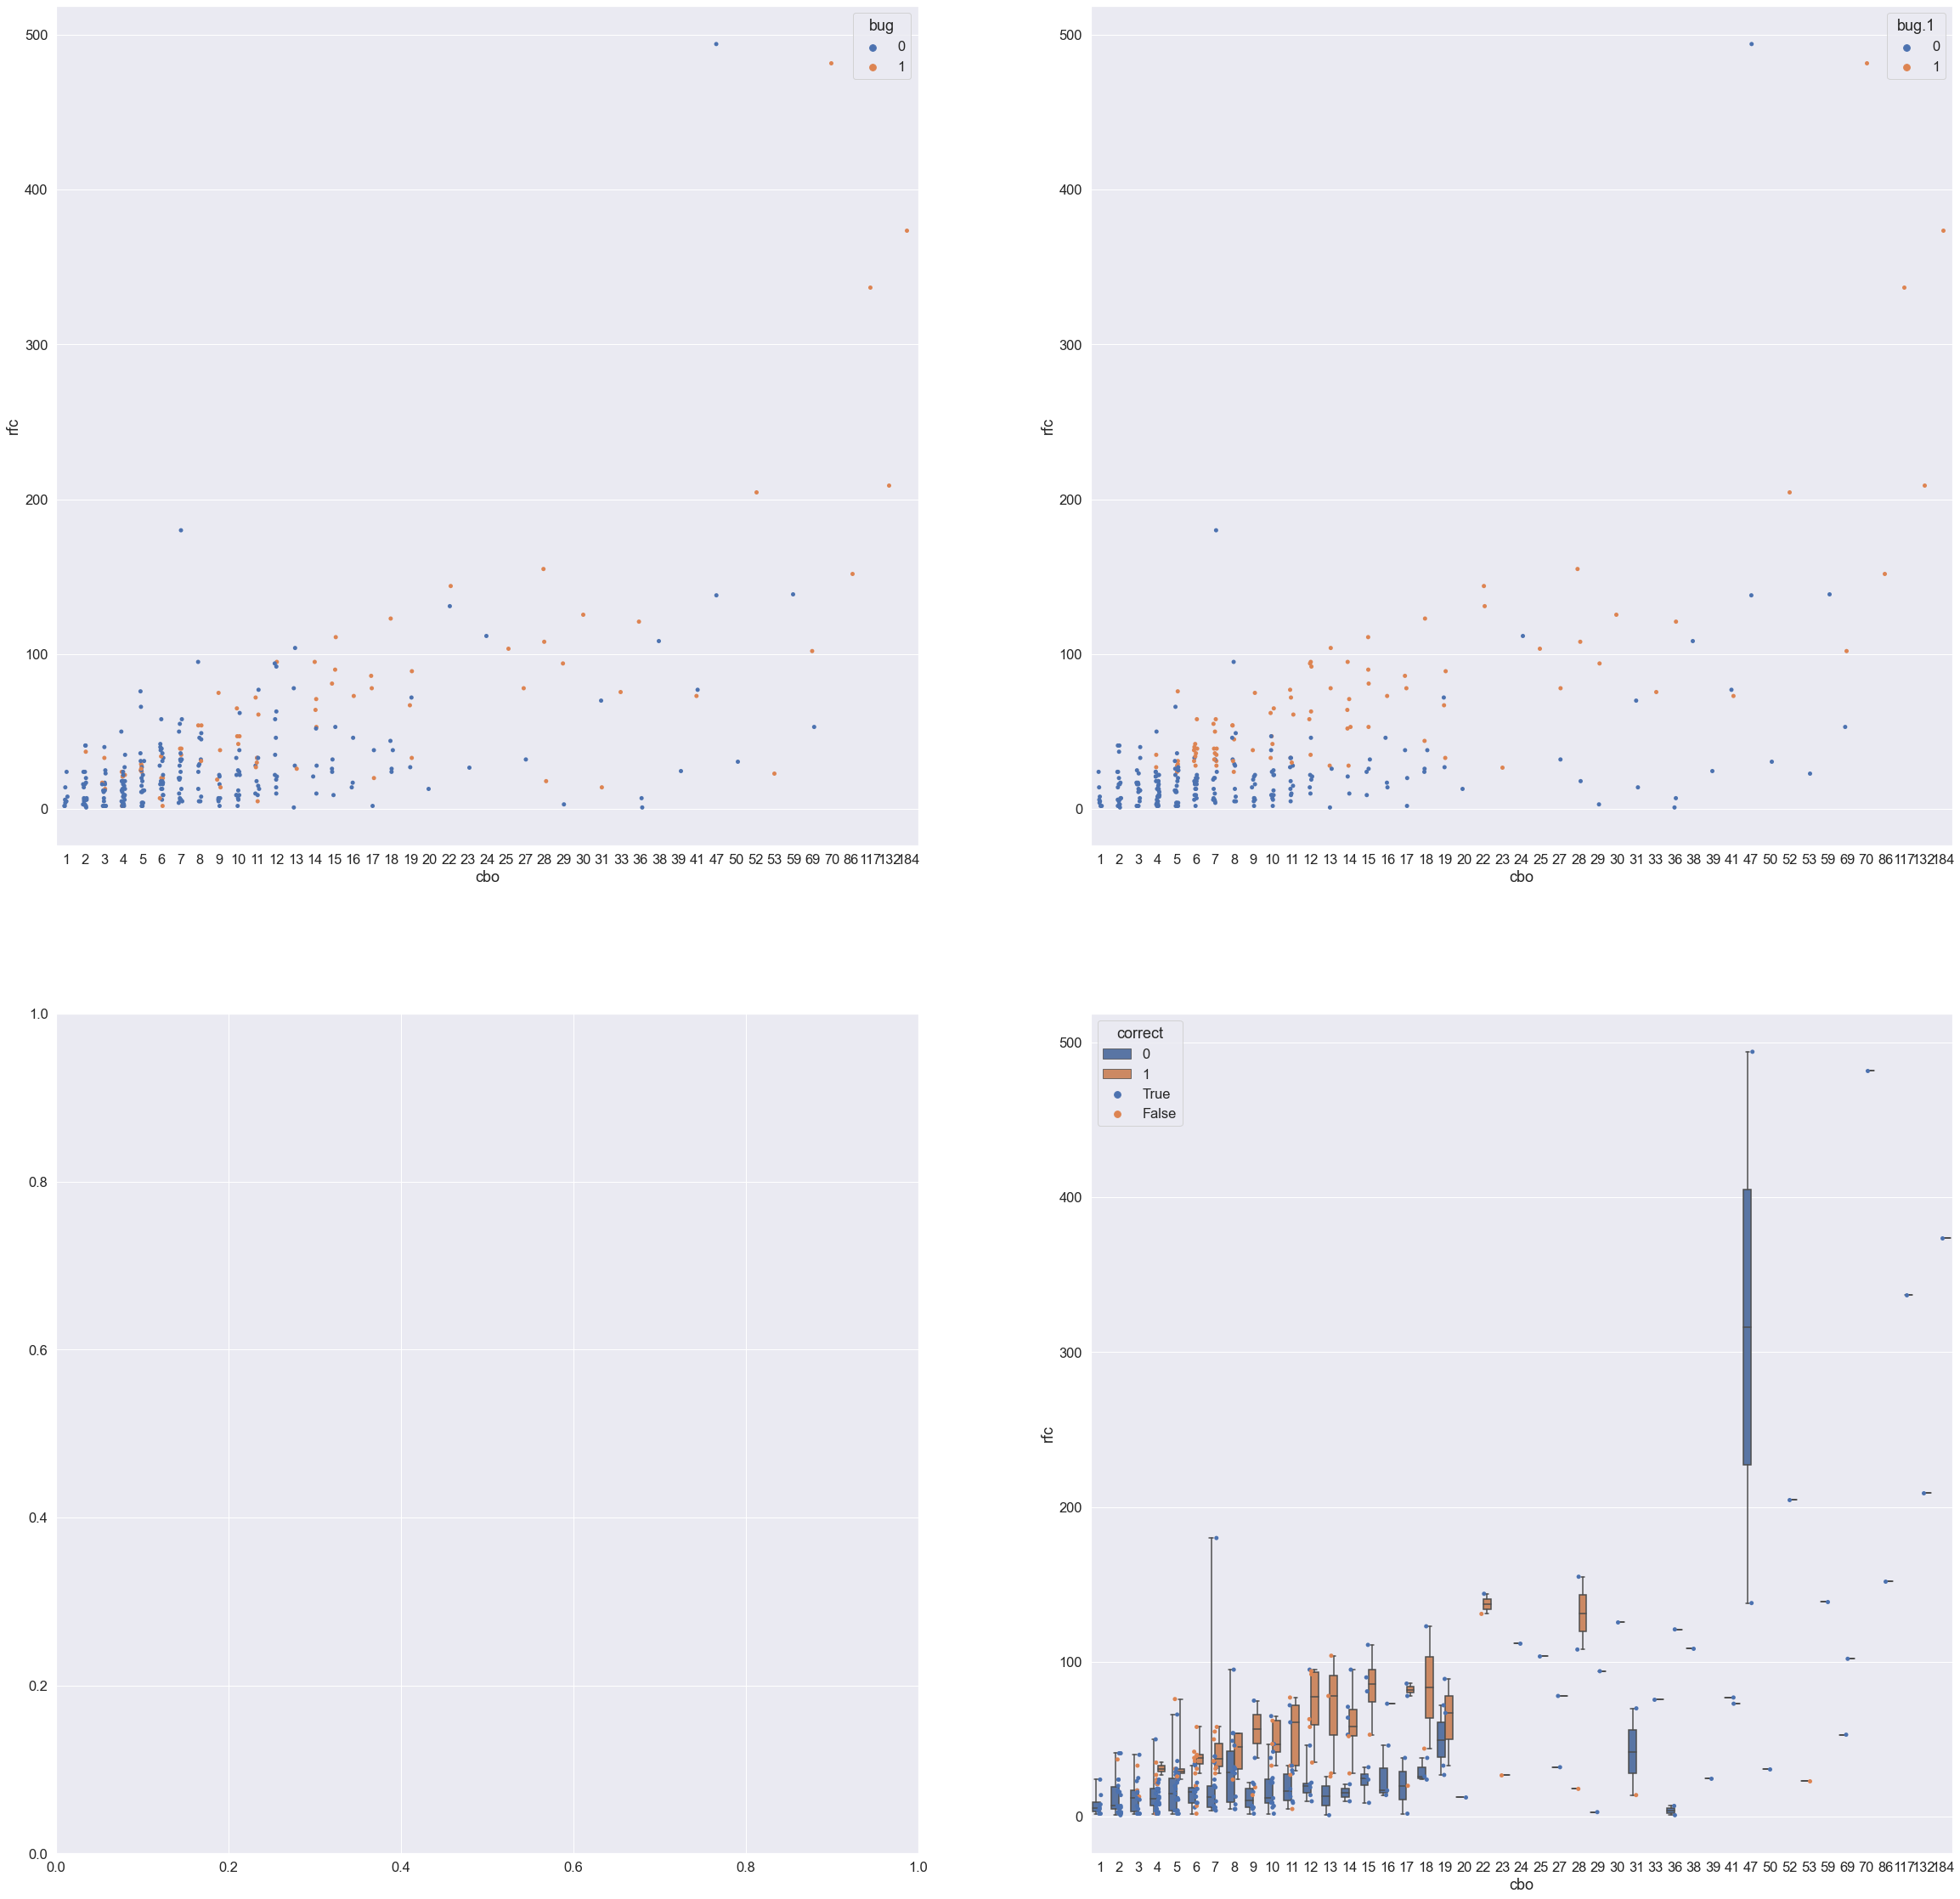

In [49]:
plot_incorrect_predictions(lucene_pres,"cbo", "rfc")

In [26]:
# finding feature importance
import time
import numpy as np
start_time = time.time()
lucene_new_rf.fit(luc_X,luc_y)
importances = lucene_new_rf.feature_importances_
feature_names = luc_X.columns
print(feature_names)

std = np.std([
    tree.feature_importances_ for tree in lucene_new_rf.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Index(['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3',
       'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc',
       'avg_cc'],
      dtype='object')
Elapsed time to compute the importances: 0.167 seconds


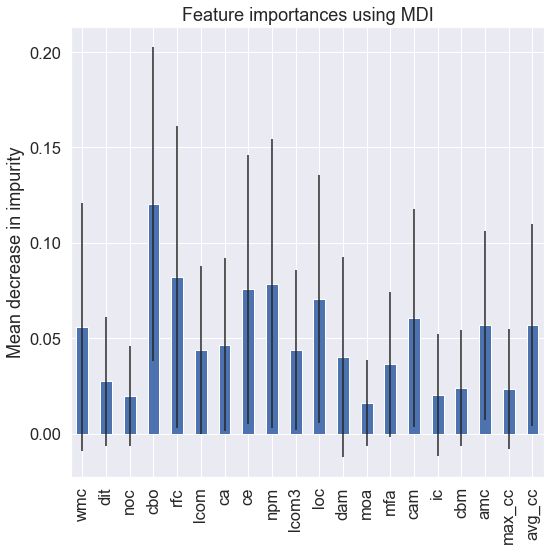

In [27]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(8,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()